目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

In [1]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得鳶尾花資料集
df = sns.load_dataset('iris')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


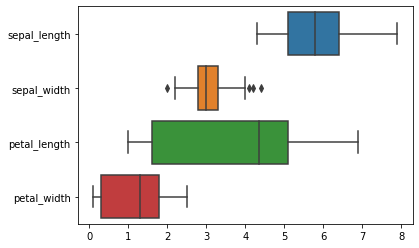

In [3]:
# 直接使用PANDAS dataframe, 當作參數
# 箱形圖顯示了數據的總體分布，同時繪製了異常值的數據點。這個物理點讓它們的特定值在樣本之間容易被識別和比較。
# 數據中的任何異常值都繪製為單個點。

sns.boxplot(data = df, orient = "h")
plt.show()

# 分布的擴散差不多是相等的，並且可以很容易地比較異常值


# 參數說明
1. x , y , hue :數據特徵, 根據實際數據，x , y常用來指定x , y軸的分類名稱，
hue常用來指定第二次分類的數據類別(用顏色區分)

2. data : DataFrame

3. jitter : True / 數字, 當數據重合較多時，用該參數做一些調整，如，jitter =  0.1  (通俗講，就是讓數據分散開)

4. dodge : True / False, 若設置為True則沿著分類軸，將數據分離出來

5. orient : 作用：設置圖的繪製方向(垂直或水平) 

6. color : matplotlib顏色

7. palette :調色板名稱，用於對數據不同分類進行顏色區別

8. size : 設置標記大小

9. edgecolor : 設置每個點的周圍線條顏色

10. linewidth : 設置構圖的線寬度

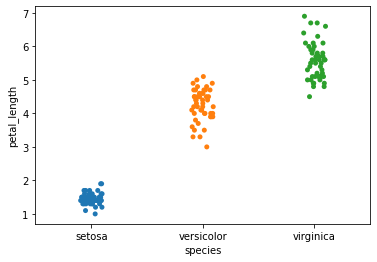

In [22]:
# 當一個或兩個正在研究的變數是分類的時,我們使用像條帶線()、swarmplot()等的圖。
# 查看到每個物種petal_length的差異。但是,散點圖的主要問題是散點圖上的點重疊
# 根據x的類別進行分組統計
sns.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

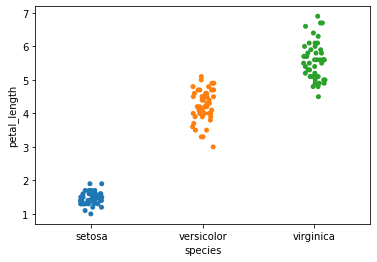

In [10]:
# 上述散點圖的主要問題是散點圖上的點重疊。我們使用"抖動"參數來處理此類方案。
# 抖動會為數據添加一些隨機雜訊。此參數將沿分類軸調整位置。
sns.stripplot(x = "species", y = "petal_length", data = df, jitter=True)
plt.show()

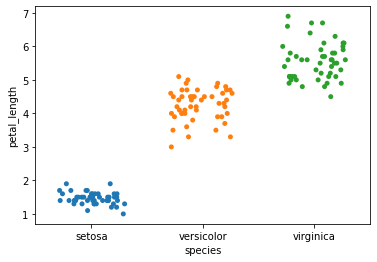

In [11]:
#可以調整jitter 參數讓分布更清晰
sns.stripplot(x = "species", y = "petal_length", data = df, jitter=0.3)
plt.show()

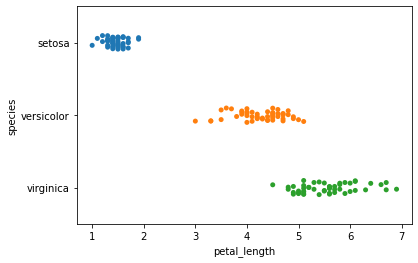

In [12]:
# 可以換個方向, 交換 x/y
sns.stripplot(x = "petal_length", y = "species", data=df, jitter=True)
plt.show()

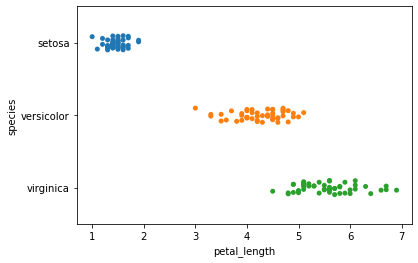

In [23]:
# dodge : True / False, 若設置為True則沿著分類軸，將數據分離出來
sns.stripplot(x = "petal_length", y = "species", data=df, dodge=True)
plt.show()

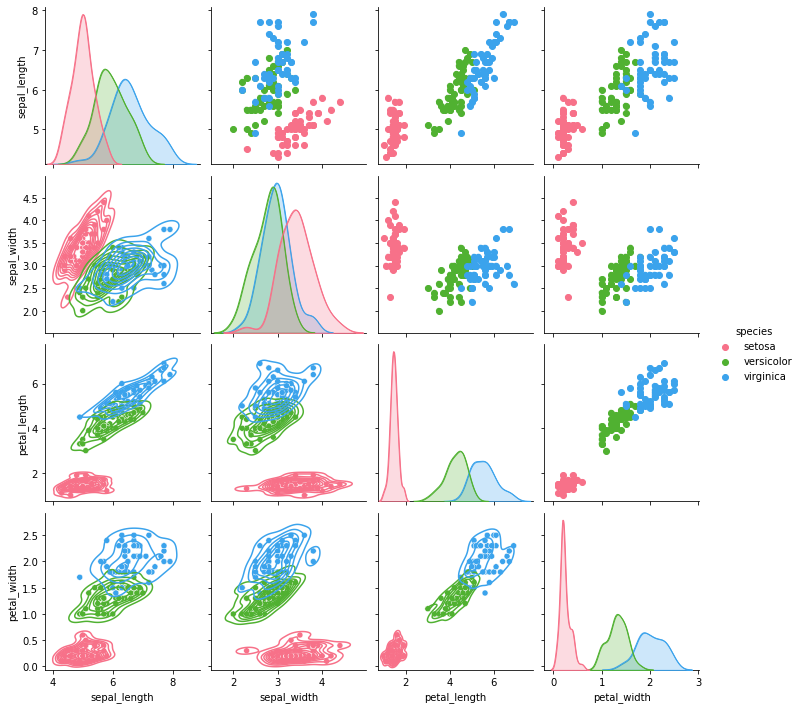

In [32]:
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot )
g.map_diag(sns.kdeplot, lw = 1, legend = False)